In [1]:
from bs4 import BeautifulSoup

html = """
<html>
<head><title> test site </title></head>
<p class='class1' align="left">test3</p>
<p class='class1'>test2</p>
<p id='p1'>오늘의 주가지수 1500</p>
<span class='class3'>span tag text</span>
<p class='class4'>test3</p>
</html>
"""


soup = BeautifulSoup(html, 'lxml')
list(soup.children)

[<html>
 <head><title> test site </title></head>
 <body><p align="left" class="class1">test3</p>
 <p class="class1">test2</p>
 <p id="p1">오늘의 주가지수 1500</p>
 <span class="class3">span tag text</span>
 <p class="class4">test3</p>
 </body></html>,
 '\n']

In [2]:
list(soup.body.children)


[<p align="left" class="class1">test3</p>,
 '\n',
 <p class="class1">test2</p>,
 '\n',
 <p id="p1">오늘의 주가지수 1500</p>,
 '\n',
 <span class="class3">span tag text</span>,
 '\n',
 <p class="class4">test3</p>,
 '\n']

In [22]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [57]:
# url = 'https://movie.naver.com/movie/bi/mi/point.nhn?code=173123#tab
basic_url = "https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword=171725&target=after&page="
url1 = "https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword=171725&target=after&page=1"
page = urlopen(url1)
soup = BeautifulSoup(page, "html.parser")
comment_all = soup.find_all('td', class_='title')
detgl=comment_all[0].find_all('a')

print(detgl[1].get("onclick").split(',')[2])



 '곤니찌와에서 ㅡ ㅡ ... 재밌다가 식었음 ㅠ'


In [58]:
temp=list(comment_all[5].children)[6].strip()
temp
comments = []
for one in comment_all:
    one_com = list(one.children)[6].strip()
    #print(one_com)
    comments.append(one_com)
comments

['곤니찌와에서 ㅡ ㅡ ... 재밌다가 식었음 ㅠ',
 '이게 예술이 아니면 뭔가요?',
 '와 ㄹㅇ 내 인생 영화에 들어갈정도로 재밌음. 특유의 BOOM이라던가 만화같은 연출이랑 팝송같은 음악이 너무 좋았음',
 '명대사:헤이',
 '진짜 고퀄리티다....',
 '스파이더맨 판권을 소니가 가져야 하는 이유',
 '갠적으로 영화 2번이상 보고싶은거 없었는데 생겼다. 힘든요즘 힘내게 해준영화 왜 이제봤지?',
 '영화도 재밌는데 연출이 일단 개신선하고 무엇보다 ost가 진짜 죽인다 ㅋㅋㅋㅋ',
 '영상미 색감 액션 정말 삼박자를 다갖춘 영화에요ㅜㅜㅜ 다채로운 색의 조합이 눈을 즐겁게 만들고 화려한액션은 정말 말할것도 없네요.... 극장에서 못본게 아쉽네요 정말 재밌게 봤습니다 !!',
 '이게 진짜 현대예술이지']

In [71]:
comments=[]
import time
cnt = 0
for i in range(1,8):
    url = basic_url + str(i)
    soup = BeautifulSoup(page, 'html.parser')
    
    commend_all = soup.find_all('td', class_='title')
    
    for comment in comment_all:
        temp=list(comment.children)
        if len(temp) < 5:
            cnt= cnt + 1
            print("len<5 case :",cnt)
            continue
        else:
            try:
                cnt= cnt + 1
                result = temp[6].strip()
                comments.append(result)
            except:
                cnt= cnt + 1
                print("len>=5 case ",cnt)
                print(temp)
        print(comments)
        print()
        
time.sleep(3)
print(len(comments))
print(comments)

['와 소니 큰그림이네 기존 마블 스파이더맨말고 흑인스파이더맨 저작권을 소니가 만들었으니 흑인스파이더맨은 소니한테 사서 써야하네. 난 더빙으로봤는데 자막으로보시기를추천. 난 다른 차원캐릭터들 돼지스파이더맨들활약기대했는데 그런거없네 흑인 비중챙기는작품임 개인적으로 9.38너무높은듯 8.5가 맞을듯']

['와 소니 큰그림이네 기존 마블 스파이더맨말고 흑인스파이더맨 저작권을 소니가 만들었으니 흑인스파이더맨은 소니한테 사서 써야하네. 난 더빙으로봤는데 자막으로보시기를추천. 난 다른 차원캐릭터들 돼지스파이더맨들활약기대했는데 그런거없네 흑인 비중챙기는작품임 개인적으로 9.38너무높은듯 8.5가 맞을듯', '그동안 이미지나 기사만 보고 뭔가 카툰애니스러울거란 선입견이 있었는데 의외로 실사로도 무리없는 제대로 된 애니였다. political correctness이 묻어 굳이 차세대 스파이디를 흑인으로 삼은건 약간 거슬렸다. 그럼 황인종 스파이디는 언제 등장시킬건데? 미래에서 로봇과 함께 온 일본 미소녀캐릭터와 이 황당함을 무마하기위해 카툰돼지 스파이더햄까지 등장시켰을때 스파이디 판권이 소니였지란 생각이 들수밖에 없었다. 어이가 없던 캐릭터들였다. 친하던 삼촌이 뜬금없이 빌런이었단 것 외엔 괜찮은 스토리와 훌륭한 그래픽이 칭찬할만하다. 피터파커를 치우고 굳이 흑인소년 마일즈를 스파이디로 만들었지만 스파이디팬들에게 원조대체에 대한 불만을 가시게 할만큼 꽤 괜찮은 스토리텔링과 흑인문화권다운 새로운 스타일링을 선보였다. 더구나 수퍼히어로물중 스파이디와 소년의 성장드라마는 찰떡이라 더더욱 만족감이 높을수밖에 없다. 선입견을 지울만큼 꽤 괜찮은 세대교체다. 그렇다고 실사영화서도 피터파커를 제거하고 마일즈나 기타 새 스파이디를 출현시켜야 하냐는데선 찬성하지 않는다. 상업성에서 성공적으로 후속작들이 쏟아졌지만 아직도 토비의 스파이디외엔 딱히 가슴에 남는 내용도 없다. 피터파커서 짜낸 스토리가 원조 토비시절말고는 삼촌을 무한반복사망시킬만큼 후속작들에서 새로 나온것도 없다. 굳이 이미지고갈

70
['와 소니 큰그림이네 기존 마블 스파이더맨말고 흑인스파이더맨 저작권을 소니가 만들었으니 흑인스파이더맨은 소니한테 사서 써야하네. 난 더빙으로봤는데 자막으로보시기를추천. 난 다른 차원캐릭터들 돼지스파이더맨들활약기대했는데 그런거없네 흑인 비중챙기는작품임 개인적으로 9.38너무높은듯 8.5가 맞을듯', '그동안 이미지나 기사만 보고 뭔가 카툰애니스러울거란 선입견이 있었는데 의외로 실사로도 무리없는 제대로 된 애니였다. political correctness이 묻어 굳이 차세대 스파이디를 흑인으로 삼은건 약간 거슬렸다. 그럼 황인종 스파이디는 언제 등장시킬건데? 미래에서 로봇과 함께 온 일본 미소녀캐릭터와 이 황당함을 무마하기위해 카툰돼지 스파이더햄까지 등장시켰을때 스파이디 판권이 소니였지란 생각이 들수밖에 없었다. 어이가 없던 캐릭터들였다. 친하던 삼촌이 뜬금없이 빌런이었단 것 외엔 괜찮은 스토리와 훌륭한 그래픽이 칭찬할만하다. 피터파커를 치우고 굳이 흑인소년 마일즈를 스파이디로 만들었지만 스파이디팬들에게 원조대체에 대한 불만을 가시게 할만큼 꽤 괜찮은 스토리텔링과 흑인문화권다운 새로운 스타일링을 선보였다. 더구나 수퍼히어로물중 스파이디와 소년의 성장드라마는 찰떡이라 더더욱 만족감이 높을수밖에 없다. 선입견을 지울만큼 꽤 괜찮은 세대교체다. 그렇다고 실사영화서도 피터파커를 제거하고 마일즈나 기타 새 스파이디를 출현시켜야 하냐는데선 찬성하지 않는다. 상업성에서 성공적으로 후속작들이 쏟아졌지만 아직도 토비의 스파이디외엔 딱히 가슴에 남는 내용도 없다. 피터파커서 짜낸 스토리가 원조 토비시절말고는 삼촌을 무한반복사망시킬만큼 후속작들에서 새로 나온것도 없다. 굳이 이미지고갈을 핑계로 피터파커를 새 인물로 갈아치워야할 이유가 없다. 더구나 페미와 political correctness에 오염된 현시대에는 더욱 동의하지 않는다.', '그냥 넘모 재밌음..', '이 영화의 세련되고 아름다울 정도의 영상미는 예술과도 같다. 그리고 그러한 영상에 걸맞는 OST들이 관객들을 

In [113]:
comments_allpage = []

cnt = 0
for i in range(1,8):
    url = basic_url + str(i)
    page = urlopen(url)
    soup = BeautifulSoup(page, 'html.parser')
    comment_all = soup.find_all('td', class_='title')

    #comments = []
    for one in comment_all:
        one_com = list(one.children)[6].strip()
        #comments.append(one_com)
        comments_allpage.append(comments)
    time.sleep(1)

print(len(comments_allpage))

# print(len(comments_allpage))


70


In [78]:
import pandas as pd
import os

dict_doc={"text":comments_allpage}
doc=pd.DataFrame(dict_doc)
doc.to_csv("스파이더맨리뷰.csv", index= False)

print(os.getcwd())
os.listdir(os.getcwd())

C:\Users\steam\data


['.ipynb_checkpoints',
 '06_16.ipynb',
 '06_17.ipynb',
 '06_17_02.ipynb',
 'D2Coding.ttf',
 'Untitled.ipynb',
 '스파이더맨리뷰.csv']

In [95]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image

In [96]:
f=open("스파이더맨리뷰_0617.csv", encoding="utf-8")
text=f.read()
f.close()

In [111]:
from matplotlib import rc
rc('font',family='NanumGothic')
from wordcloud import WordCloud
os.getcwd()

'C:\\Users\\steam\\data'

(-0.5, 399.5, 199.5, -0.5)

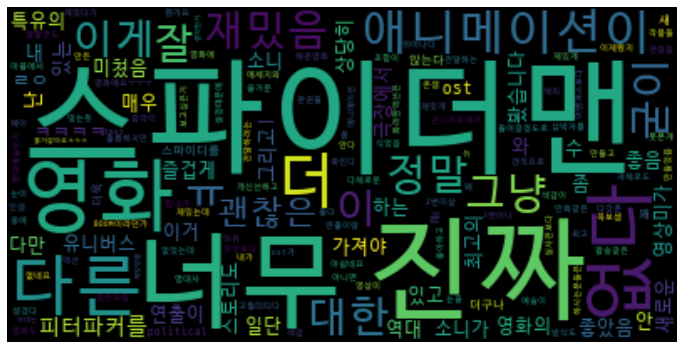

In [112]:

from matplotlib import rc
rc('font', family='NanumGothic')

wcloud = WordCloud('./data/D2Coding.ttf',
                   max_words=1000,
                   relative_scaling = 0.5).generate(text)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")

In [114]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [115]:
url = "https://movie.naver.com/movie/running/current.nhn"
page = urlopen(url)
soup = BeautifulSoup(page, 'lxml')

# 01.제목 가져오기

In [162]:
fis5=soup.find('ul', class_="1st_detail_t1")

tit=soup.find_all('dt', class_="tit")
scor=soup.find_all('span', class_="num")
pnu=soup.find_all('span', class_="num2")
yeme=soup.find_all('div', class_="star_t1 b_star")
gam=soup.find_all('dl', class_="info_txt1")

for i in range(len(fis)):
    mok= tit[i].find('a').text
    score= scor[i].text
    pnum=pnu[i].find('em').text
    try:
        yem=yeme[i].find('span').text
    except:
        yem="0"
    gamdok=gam[i].find_all('span', class_="link_txt")
    rgamdok=gamdok[1].find('a').text

    print(mok+" 감독:"+rgamdok+"평점 :"+score+" 참여인원("+pnum+") 예매율:"+yem+"%" )
   


크루엘라 감독:크레이그 질레스피평점 :9.33 참여인원(4,582) 예매율:19.7%
콰이어트 플레이스 2 감독:존 크래신스키평점 :19.7 참여인원(314) 예매율:15.92%
루카 감독:엔리코 카사로사평점 :8.63 참여인원(17) 예매율:15.26%
극장판 귀멸의 칼날: 무한열차편 감독:소토자키 하루오평점 :15.92 참여인원(12,374) 예매율:7.52%
여고괴담 여섯번째 이야기 : 모교 감독:이미영평점 :8.88 참여인원(38) 예매율:6.59%
컨저링 3: 악마가 시켰다 감독:마이클 차베즈평점 :15.26 참여인원(1,757) 예매율:6.54%
캐시트럭 감독:가이 리치평점 :9.29 참여인원(546) 예매율:5.61%
분노의 질주: 더 얼티메이트 감독:저스틴 린평점 :7.52 참여인원(5,405) 예매율:3.14%
뱅드림! 로젤리아 에피소드Ⅰ: 약속 감독:코다이 카키모토평점 :6.63 참여인원(46) 예매율:1.89%
파이프라인 감독:유하평점 :6.59 참여인원(1,324) 예매율:1.62%
아야와 마녀 감독:미야자키 고로평점 :6.73 참여인원(134) 예매율:1.45%
클라이밍 감독:김혜미평점 :6.54 참여인원(13) 예매율:1.37%
그 여름, 가장 차가웠던 감독:주순평점 :8.21 참여인원(5) 예매율:0.88%
그레타 툰베리 감독:나탄 그로스만평점 :5.61 참여인원(4) 예매율:0.81%
야구소녀 감독:최윤태평점 :7.65 참여인원(905) 예매율:0.56%
노매드랜드 감독:클로이 자오평점 :3.14 참여인원(567) 예매율:0.47%
프로페서 앤 매드맨 감독:P.B. 셰므란평점 :8.52 참여인원(87) 예매율:0.42%
혼자 사는 사람들 감독:홍성은평점 :1.89 참여인원(154) 예매율:0.37%
애플 감독:크리스토스 니코우평점 :7.11 참여인원(47) 예매율:0.27%
500일의 썸머 감독:마크 웹평점 :1.62 참여인원(4,502) 예매율:0.22%
낫아웃 감독:이정곤평점 :7.38 참여인원(132) 예매율:0.22%
썰 감